<a href="https://colab.research.google.com/github/pscabral/IFMASOFTEX_1/blob/main/ModeloYOLO8_1.00.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mega.py

from mega import Mega

# Crie uma instância da classe Mega
mega = Mega()

# Cole o link completo do Mega.nz (incluindo a chave)
url = "https://mega.nz/file/tu0GXQzL#BGoVzch2_6s2EEQYLfkwpct1Uq-ZrRL2sHCOY54vohs"

# Use o link completo para fazer o download
mega.download_url(url)

!unzip vegetables.v4i.yolov8.zip

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!pip install ultralytics

In [ ]:
!git clone https://github.com/haoyaogang/ultralytics-yolov8.git
%cd ultralytics-yolov8

In [ ]:
!pip install -U -r requirements.txt

In [13]:
from PIL import Image
import os
import numpy as np
import torch
import random
import pathlib
from torch.utils.data import Dataset
import json
from torchvision import transforms, utils
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO, utils

In [14]:
class Config:
    CHECKPOINT_DIR = 'checkpoints'
    EXPERIMENT_NAME = '/content/vegetables'
    DATA_DIR = '../content/vegetables'
    TRAIN_IMAGES_DIR = 'train/images'
    TRAIN_LABELS_DIR = 'train/labels'
    VAL_IMAGES_DIR = 'valid/images'
    VAL_LABELS_DIR = 'valid/labels'
    TEST_IMAGES_DIR = 'test/images'
    TEST_LABELS_DIR = 'test/labels'
    CLASSES = ['apple', 'banana', 'bell_pepper', 'carrot', 'cauliflower', 'chillies', 'cucumber', 'garlic', 'grapes', 'mango', 'mushroom', 'onion', 'orange', 'pear', 'potato', 'promegranate', 'tomato', 'watermelon']
    NUM_CLASSES = len(CLASSES)
    DATALOADER_PARAMS = {'batch_size': 16, 'num_workers': 2}
    YOLO_VERSION = 'yolov8'  # or 'yolov8-csp', 'yolov8x-mish', etc.
    PRETRAINED_WEIGHTS = 'coco'

In [15]:
config = Config()

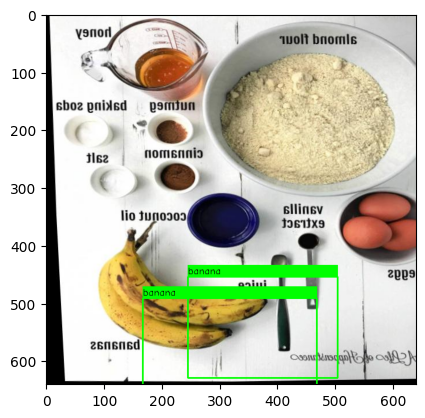

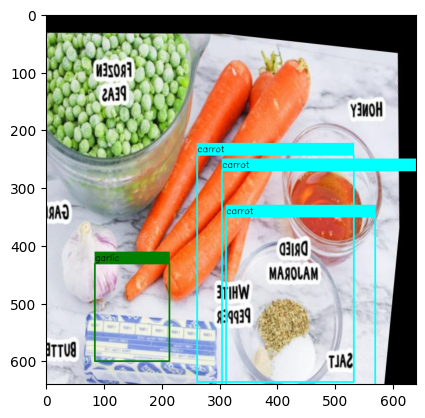

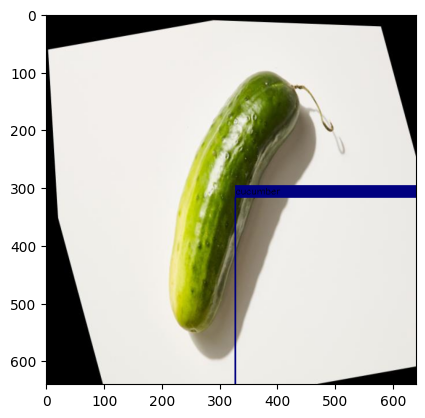

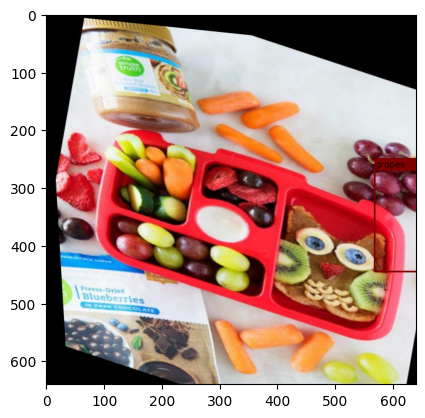

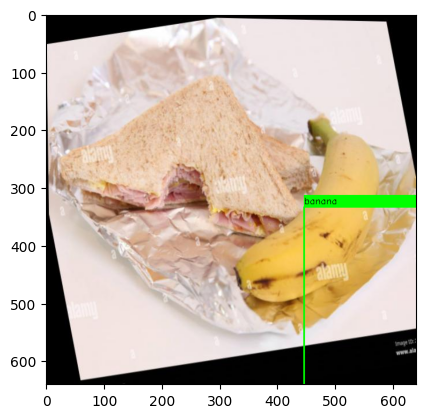

In [16]:
train_images_dir = os.path.join(config.DATA_DIR, config.TRAIN_IMAGES_DIR)
train_labels_dir = os.path.join(config.DATA_DIR, config.TRAIN_LABELS_DIR)

num_images = 5

image_files = [f for f in pathlib.Path(train_images_dir).iterdir() if f.is_file()]

random.shuffle(image_files)

selected_image_files = image_files[:num_images]

colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255), (255, 0, 255),
          (128, 0, 0), (0, 128, 0), (0, 0, 128), (128, 128, 0), (0, 128, 128), (128, 0, 128),
          (64, 0, 0), (0, 64, 0), (0, 0, 64), (64, 64, 0), (0, 64, 64), (64, 0, 64)]

for selected_image_file in selected_image_files:
    demo_image = selected_image_file

    demo_label = pathlib.Path(train_labels_dir) / f"{selected_image_file.stem}.txt"

    image = cv2.imread(str(demo_image))

    class_list = config.CLASSES

    height, width, _ = image.shape

    with open(demo_label, "r") as file1:
        for line in file1.readlines():

            split = line.split(" ")

            class_id = int(split[0])

            if 0 <= class_id < len(colors):

                color = colors[class_id]
                clazz = class_list[class_id]

                x, y, w, h = map(float, split[1:5])

                box = [int(x * width), int(y * height), int(w * width), int(h * height)]

                cv2.rectangle(image, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]), color, 2)

                cv2.rectangle(image, (box[0], box[1] - 20), (box[0] + box[2], box[1]), color, -1)

                cv2.putText(image, clazz, (box[0], box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

            else:
                print(f"ID da classe inválido: {class_id}. Certifique-se de que está dentro da faixa [0, {len(colors) - 1}].")

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    image = cv2.resize(image, (600, 600))
    plt.show()

In [2]:
!cat /content/vegetables/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 18
names: ['apple', 'banana', 'bell_pepper', 'carrot', 'cauliflower', 'chillies', 'cucumber', 'garlic', 'grapes', 'mango', 'mushroom', 'onion', 'orange', 'pear', 'potato', 'promegranate', 'tomato', 'watermelon']

roboflow:
  workspace: news
  project: vegetables-mr0jj
  version: 4
  license: CC BY 4.0
  url: https://universe.roboflow.com/news/vegetables-mr0jj/dataset/4

In [19]:
! yolo task=detect mode=train model=yolov8n.pt imgsz=640 data=/content/vegetables/data.yaml epochs=10 batch=8 name=yolov8n_custom

Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/vegetables/data.yaml, epochs=10, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_custom2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fa

In [ ]:
from ultralytics import YOLO

# Load the model.
model = YOLO('yolov8n.pt')

# Training.
results = model.train(
   data='/content/vegetables/data.yaml',
   imgsz=1280,
   epochs=10,
   batch=8,
   name='yolov8n_v8_50e'
)

In [3]:
results = model.predict("/content/frutas01.jpg")

NameError: ignored

In [6]:
import torch
from torchvision import transforms
from PIL import Image

# Load the pre-trained YOLOv8 model
#model = torch.hub.load('ultralytics/yolov5:v5.0', 'custom', path='/content/runs/detect/yolov8n_custom2/weights/last.pt)
model = torch.hub.load('ultralytics/yolov5:v5.0', 'custom', path='/content/runs/detect/yolov8n_custom2/weights/last.pt')


# Load and preprocess the image
img_path = '/content/frutas01.jpg'
img = Image.open(img_path)

# Apply transforms to the image
transform = transforms.Compose([
    transforms.Resize((640, 640)),  # Adjust size based on your model's input size
    transforms.ToTensor(),
])

img = transform(img).unsqueeze(0)  # Add batch dimension

# Perform inference
results = model(img)

# Display the results
results.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_v5.0


TypeError: ignored

In [9]:
# Load and preprocess the image
img_path = '/content/frutas01.jpg'
img = Image.open(img_path)
# Perform inference

# Display the results
results.show()

NameError: ignored